In [81]:
import pickle
import numpy as np

with open("../data/nnfit.pkl", "rb") as f:
    data = pickle.load(f)
data['y_pred'] = [int(x[0]) for x in data['y_pred']]

for key, vals in data.items():
    data[key] = np.array(vals)

In [82]:
accuracy_score(data['y_true'], data['y_pred'])

0.98898

In [83]:
from sklearn.metrics import classification_report

print(classification_report(data['y_true'], data['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     25025
           1       0.99      0.98      0.99     24975

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(data['y_true'], data['y_pred'])

array([[24853,   172],
       [  379, 24596]])

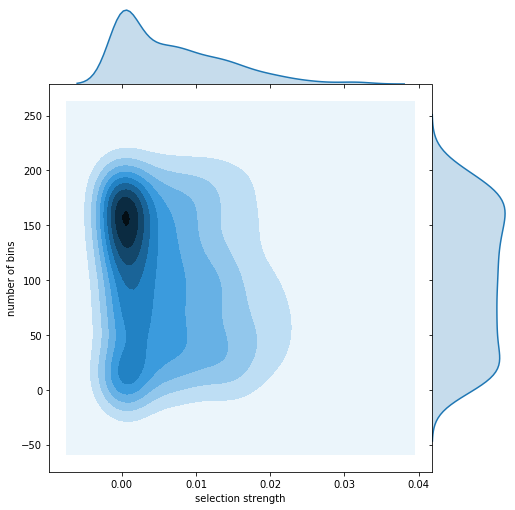

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw the two density plots
indexes = (data['y_pred'] != data['y_true'])
g = sns.jointplot(data['selection'][indexes], data['bins'][indexes],
                  kind="kde", height=7, space=0)
g.set_axis_labels(xlabel="selection strength", ylabel="number of bins");

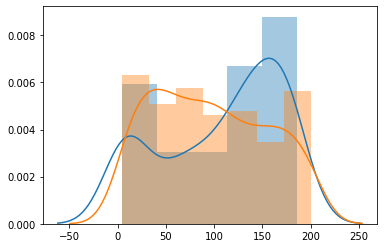

In [87]:
indexes = (data['y_pred'] != data['y_true']) & (data['y_true'] == 0)
sns.distplot(data['bins'][indexes])

indexes = (data['y_pred'] != data['y_true']) & (data['y_true'] == 1)
sns.distplot(data['bins'][indexes]);